### 1.
<font color='blue'>
Se sabe que el peso de los recién nacidos (en kg)  en el Hospital de la Arrixaca es una variable continua con la siguiente función de densidad:

$$
f(x) =\left\{\begin{array}{llll} k \cdot x & \text{si } 2 < x < 4.5\\   0 & \text{ en otro caso}\end{array}\right.
$$

**Objetivos:**
1. Hallar \( k \) para que \( f(x) \) sea una función de densidad.
2. Calcular la función de distribución acumulada (CDF), la esperanza y la varianza.
3. Calcular \( P(X > 3) \)
4. Calcular \( P(3 < X < 4) \)
5. Determinar el percentil 90
6. Determinar los pesos que definen las siguientes categorías:
   - Primera categoría: 20% que pesa menos.
   - Segunda categoría: resto.
   - Tercera categoría: 10% que pesa más.
7. Simular la variable 10,000 veces y comparar con resultados teóricos.
</font>


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root_scalar
import seaborn as sns

# Paso 1: Calcular constante de normalización k
area, _ = quad(lambda x: x, 2, 4.5)
k = 1 / area
print(f"Valor de k: {k:.4f}")

# Función escalar f(x), solo para usar en integrales
def f(x):
    if x <= 2:
        return 0
    elif x >= 4.5:
        return 0
    else:
        return k * x

# Función vectorizada f(x), para usar con arrays y gráficas
def f_vec(x):
    return np.where((x > 2) & (x < 4.5), k * x, 0)

# Función de distribución acumulada F(x)
def F(x):
    result, _ = quad(f_vec, 2, x)
    return result
F_vec = np.vectorize(F)

Valor de k: 0.1231


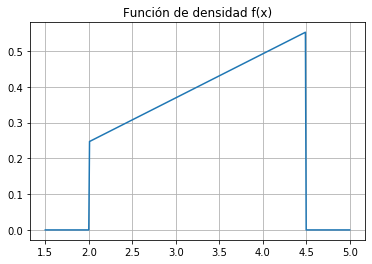

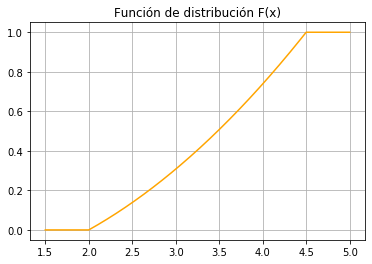

In [24]:
# Gráficas
x_vals = np.linspace(1.5, 5, 400)
plt.plot(x_vals, f_vec(x_vals), label='f(x)')
plt.title("Función de densidad f(x)")
plt.grid(True)
plt.show()
plt.plot(x_vals, F_vec(x_vals), label='F(x)', color='orange')
plt.title("Función de distribución F(x)")
plt.grid(True)
plt.show()


In [28]:
# Media
media, _ = quad(lambda x: x * f(x), 2, 4.5)
print(f"Media: {media:.4f}")

# Varianza
varianza, _ = quad(lambda x: ((x - media)**2) * f(x), 2, 4.5)
desviacion_tipica = np.sqrt(varianza)
print(f"Varianza: {varianza:.4f}")
print(f"Desviación típica: {desviacion_tipica:.4f}")


Media: 3.4103
Varianza: 0.4952
Desviación típica: 0.7037


In [29]:
# P(X > 3)
p_mayor_3 = 1 - F(3)
print(f"P(X > 3): {p_mayor_3:.4f}")

# P(3 < X < 4)
p_entre_3_y_4 = F(4) - F(3)
print(f"P(3 < X < 4): {p_entre_3_y_4:.4f}")


P(X > 3): 0.6923
P(3 < X < 4): 0.4308


In [30]:
def percentil(p):
    sol = root_scalar(lambda x: F(x) - p, bracket=[2, 4.5])
    return sol.root

p90 = percentil(0.9)
print(f"Percentil 90: {p90:.4f}")


Percentil 90: 4.3157


In [31]:
p20 = percentil(0.2)
p90 = percentil(0.9)
print(f"Categoría 1 (<20%): x < {p20:.4f}")
print(f"Categoría 2 (20%-90%): {p20:.4f} < x < {p90:.4f}")
print(f"Categoría 3 (>90%): x > {p90:.4f}")


Categoría 1 (<20%): x < 2.6926
Categoría 2 (20%-90%): 2.6926 < x < 4.3157
Categoría 3 (>90%): x > 4.3157


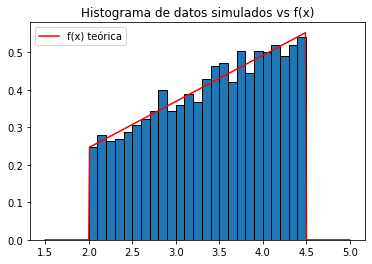

Media simulada: 3.4107
Varianza simulada: 0.4889
Diferencia con media teórica: 0.0004
Diferencia con varianza teórica: 0.0063


In [32]:
# Simulación usando la inversa de F (método de transformación inversa)
u = np.random.uniform(0, 1, 10000)
datos = np.array([percentil(p) for p in u])

# Histograma
plt.hist(datos, bins=np.arange(2, 4.6, 0.1), density=True, edgecolor='black')
plt.plot(x_vals, f_vec(x_vals), color='red', label='f(x) teórica')
plt.title("Histograma de datos simulados vs f(x)")
plt.legend()
plt.show()

# Comparaciones
media_sim = np.mean(datos)
varianza_sim = np.var(datos)

print(f"Media simulada: {media_sim:.4f}")
print(f"Varianza simulada: {varianza_sim:.4f}")
print(f"Diferencia con media teórica: {abs(media_sim - media):.4f}")
print(f"Diferencia con varianza teórica: {abs(varianza_sim - varianza):.4f}")


# 2. 
<font color= 'blue'> En una fábrica de envasado se comprueba que el peso en kilos de los envases es una variable aleatoria continua cuya función de densidad es:
$$
f(x) =\left\{\begin{array}{llll} k \cdot (x-3)^2 & \text{si } 2.7 < x < 3.3\\   0 & \text{ en otro caso}\end{array}\right.
$$

**Objetivos:**

1. Hallar k para que f sea una función de densidad.
2. Analiza la variable (valores, dibuja la función de densidad, calcula y dibuja la función de distribución y calcula su media y varianza)
3. Si se cogen dos envases, calcula la probabilidad de que al menos uno de ellos pese más de 3 kilos.
4. Calcula los cuartiles e indica si habría valores que podrían considerarse como atípicos.
5. Haz un programa que simule la variable anterior. Calcula 10000 datos con ese programa y compara el histograma, media, varianza, etc de estos datos con los resultados de los apartados anteriores
</font>

In [35]:
# Paso 1: Calcular constante de normalización k
area, _ = quad(lambda x: (x-3)**2, 2.7, 3.3)
k = 1 / area
print(f"Valor de k: {k:.4f}")

# Función escalar f(x), solo para usar en integrales
def f(x):
    if x <= 2.7:
        return 0
    elif x >= 3.3:
        return 0
    else:
        return k * (x-3)**2

# Función vectorizada f(x), para usar con arrays y gráficas
def f_vec(x):
    return np.where((x > 2.7) & (x < 3.3), k * (x-3)**2, 0)

# Función de distribución acumulada F(x)
def F(x):
    result, _ = quad(f_vec, 2.7, x)
    return result
F_vec = np.vectorize(F)

Valor de k: 55.5556


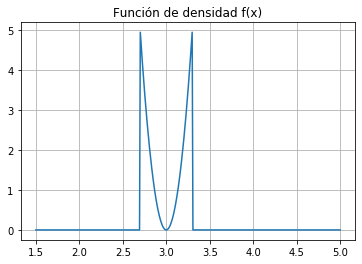

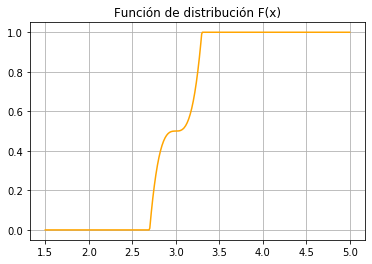

In [36]:
# Gráficas
x_vals = np.linspace(1.5, 5, 400)
plt.plot(x_vals, f_vec(x_vals), label='f(x)')
plt.title("Función de densidad f(x)")
plt.grid(True)
plt.show()
plt.plot(x_vals, F_vec(x_vals), label='F(x)', color='orange')
plt.title("Función de distribución F(x)")
plt.grid(True)
plt.show()

In [38]:
# Media
media, _ = quad(lambda x: x * f(x), 2.7, 3.3)
print(f"Media: {media:.4f}")

# Varianza
varianza, _ = quad(lambda x: ((x - media)**2) * f(x), 2.7, 3.3)
desviacion_tipica = np.sqrt(varianza)
print(f"Varianza: {varianza:.4f}")
print(f"Desviación típica: {desviacion_tipica:.4f}")

Media: 3.0000
Varianza: 0.0540
Desviación típica: 0.2324


<font color='blue'> Si se cogen dos envases, calcula la probabilidad de que al menos uno de ellos pese más de 3 kilos. </font>

Para resolverlo, consideramos los sucesos $A_i$: El peso del envase $i$ es $>3$, para $i=1,2$. Nos piden 
$$P(A_1\cup A_2)=P(A_1)+P(A_2)-P(A_1\cap A_2)=P(A_1)+P(A_2)-P(A_1)P(A_2)$$ porque son sucesos independientes. Ahora bien, $$P(A_1)=P(A_2)=P(X>3)=1-P(X\leq 3)=1-F_X(3)$$

In [40]:
PA1=1-F_vec(3)
PA1

0.4999999999999998

Ahora podemos responder la pregunta:

In [41]:
Sol=2*PA1-PA1**2
Sol

0.7499999999999998

<font color='blue'> Calcula los cuartiles e indica si habría valores que podrían considerarse como atípicos. </font>

In [47]:
def percentil(p):
    sol = root_scalar(lambda x: F(x) - p, bracket=[2, 4.5])
    return sol.root

percentil=np.vectorize(percentil)
Q1,Q2,Q3 = percentil([0.25,0.5,0.75])
print(f"Cuartiles : ") 
print([Q1,Q2,Q3])
RI=Q3-Q1
O1,O2=[Q1-1.5*RI,Q3+1.5*RI]
print("Valores extremos:")
print([O1,O2])

Cuartiles : 
[2.7618898422047704, 3.0000010537239827, 3.238110157795004]
Valores extremos:
[2.04755936881942, 3.9524406311803544]


In [48]:
print("No hay valores atípicos para esta v.a.")

No hay valores atípicos para esta v.a.


<font color='blue'> Haz un programa que simule la variable anterior. Calcula 10000 datos con ese programa y compara el histograma, media, varianza, etc de estos datos con los resultados de los apartados anteriores. </font>

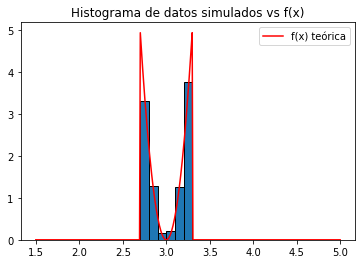

Media simulada: 3.0109
Varianza simulada: 0.0538
Diferencia con media teórica: 0.0109
Diferencia con varianza teórica: 0.0002


In [50]:
# Simulación usando la inversa de F (método de transformación inversa)
u = np.random.uniform(0, 1, 1000)
datos = np.array([percentil(p) for p in u])

# Histograma
plt.hist(datos, bins=np.arange(2.3, 3.6, 0.1), density=True, edgecolor='black')
plt.plot(x_vals, f_vec(x_vals), color='red', label='f(x) teórica')
plt.title("Histograma de datos simulados vs f(x)")
plt.legend()
plt.show()

# Comparaciones
media_sim = np.mean(datos)
varianza_sim = np.var(datos)

print(f"Media simulada: {media_sim:.4f}")
print(f"Varianza simulada: {varianza_sim:.4f}")
print(f"Diferencia con media teórica: {abs(media_sim - media):.4f}")
print(f"Diferencia con varianza teórica: {abs(varianza_sim - varianza):.4f}")

# 3. 
<font color='red'> De una variable aleatoria continua X se sabe que toma valores entre 2 y 6 y que su función de densidad es:
$$
f(x) =\left\{\begin{array}{llll} k \cdot (x^2+x) & \text{si } 2 < x < 6\\   0 & \text{ en otro caso}\end{array}\right.
$$

**Objetivos:**
    
1. Hallar k para que f sea una función de densidad.
2. Analiza la variable (valores, dibuja la función de densidad, calcula y dibuja la función de distribución y calcula su media y varianza)
3. Calcula las siguientes probabilidades 
• P(X≥3)
• P(X<5)
• P(3<X≤4)
4. Calcula los percentiles 10% y 90% de la variable.
5. Haz un programa que simule la variable anterior. Calcula 10000 datos con ese programa y compara el histograma, media, varianza, etc de estos datos con los resultados de los apartados anteriores. </font>